<a href="https://colab.research.google.com/github/Ani4343/Fraudulent-Credit-Card-Transaction-Detection/blob/main/Fraudulent_Credit_Card_Transaction_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/creditcard_2023.csv")

In [ ]:
df.shape

(568630, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
# cheking balance data
Valid = df[df.Class == 0]
Fraud = df[df.Class == 1]

In [ ]:
print(Valid.shape)
print(Fraud.shape)

(284315, 30)
(284315, 30)


observations

1)We have 568630 rows of obervations having 30 columns

2)'Class' is target feature indicating whether the transaction is "Fraudulent" (1) or "Not Fraudulent" (0)

3)"V1-V28" anonymized features representing various transaction attributes.

4)Data types of all the features looks perfects

In [ ]:
df.describe(include = 'all')

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.head()
# shows the data and shows the target column 1 for fraudulent, 0 for non-fraudulent transactions

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


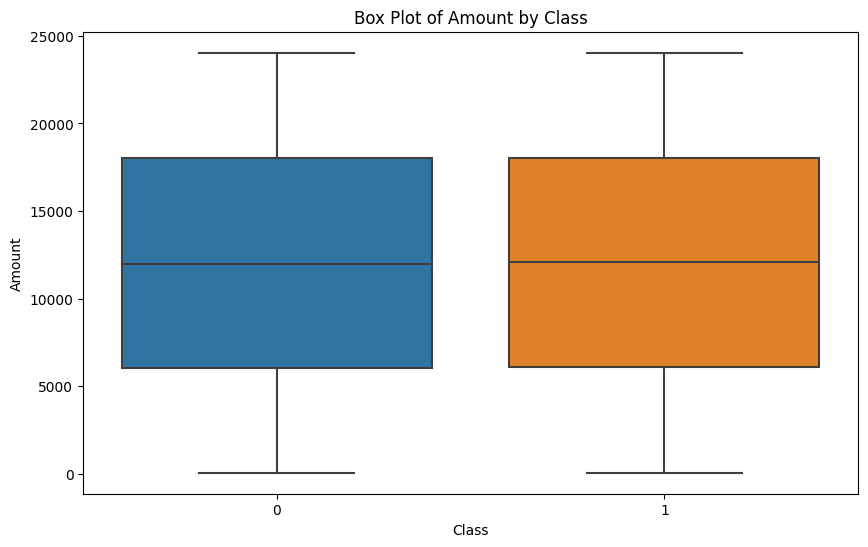

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Box Plot of Amount by Class')
plt.show()

# To see the data about class column by diving two into

In [ ]:
# drop column id cause it is not important

df.drop(['id'], axis=1, inplace=True)

<Axes: >

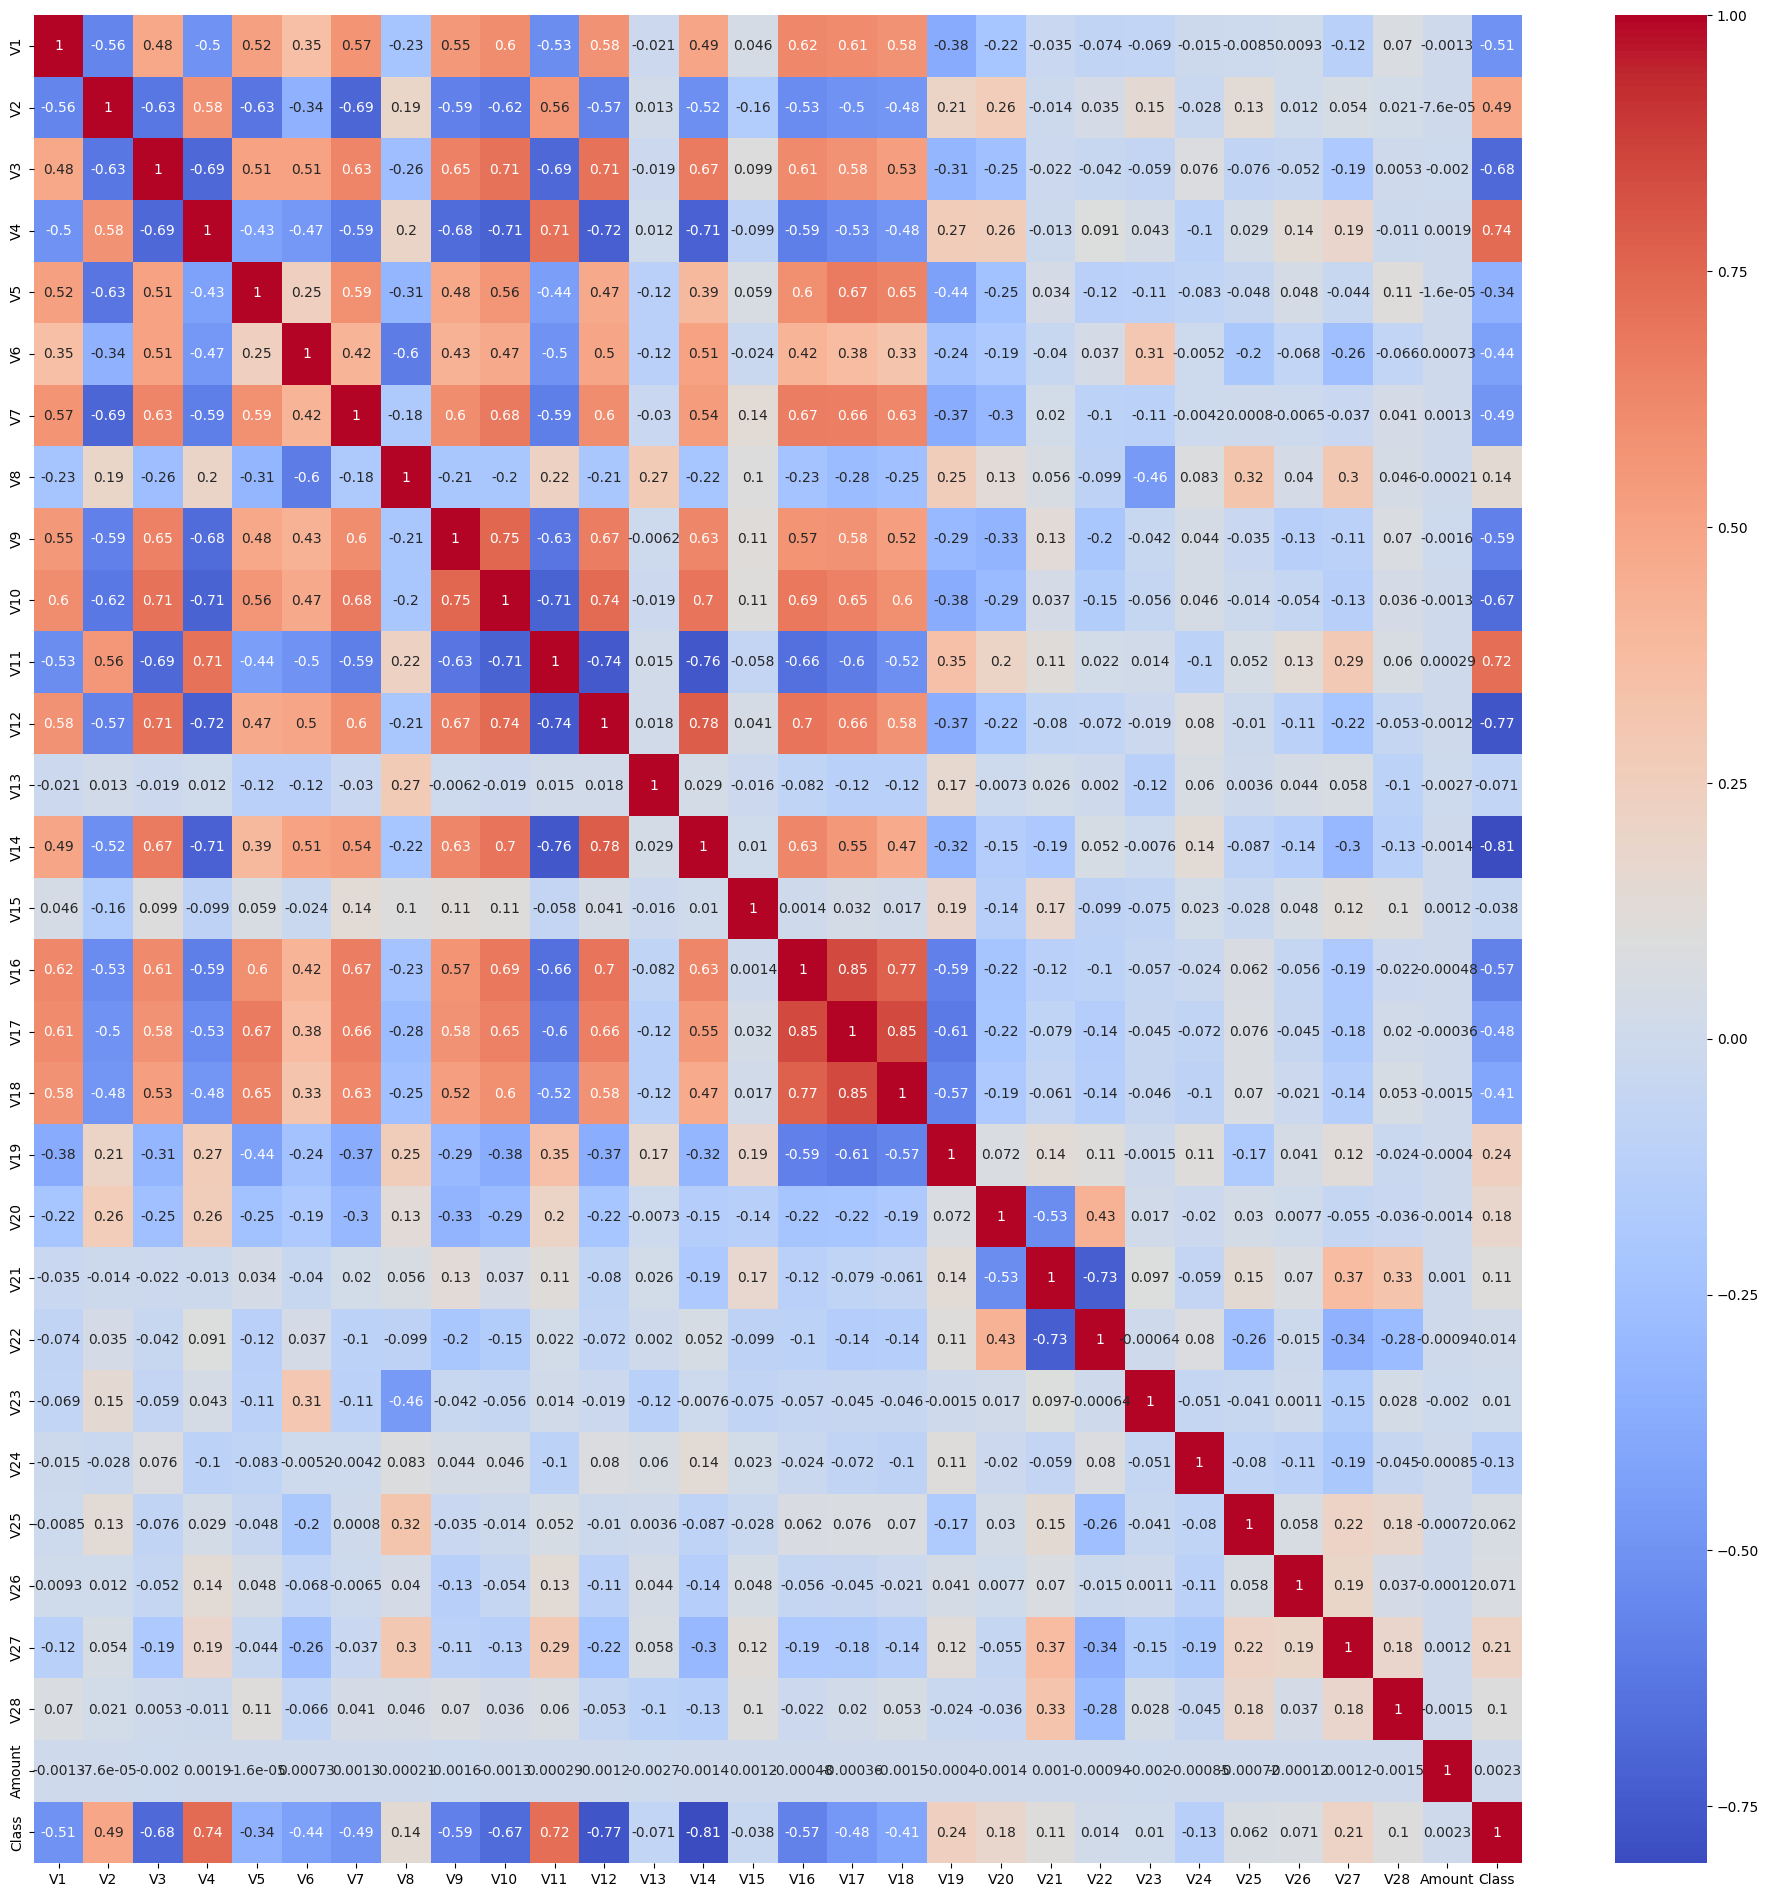

In [ ]:
plt.figure(figsize = (24,24))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

# To find out relation of columns with each other and to find out the which columns will be more corelated with target column which is class column

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
correlations = df.corr()['Class'].sort_values()

# Create 3 levels of correlation
high_corr = correlations[correlations > 0.5]
medium_corr = correlations[(correlations <= 0.5) & (correlations > 0.1)]
low_corr = correlations[correlations <= 0.1]

print("High Correlation:\n", high_corr)
print("\nMedium Correlation:\n", medium_corr)
print("\nLow Correlation:\n", low_corr)


High Correlation:
 V11      0.724278
V4       0.735981
Class    1.000000
Name: Class, dtype: float64

Medium Correlation:
 V28    0.102024
V21    0.109640
V8     0.144294
V20    0.179851
V27    0.214002
V19    0.244081
V2     0.491878
Name: Class, dtype: float64

Low Correlation:
 V14      -0.805669
V12      -0.768579
V3       -0.682095
V10      -0.673665
V9       -0.585522
V16      -0.573511
V1       -0.505761
V7       -0.491234
V17      -0.476377
V6       -0.435088
V18      -0.410091
V5       -0.338639
V24      -0.130107
V13      -0.071105
V15      -0.037948
Amount    0.002261
V23       0.010255
V22       0.014098
V25       0.061847
V26       0.071052
Name: Class, dtype: float64


from above heatmap we understood the reltionship between columns that
the columns that


*   Highly correlated:  V11, V4,id
*   Medium correlated:  V28, V21, V8, V20, V27, V19, V2
*   Least correlated:  V14, V12, v3, V10, V9, V16, V1, V7, V17, V6, V18, V5, V24, V13, V15, Amount, V23, V22, V25, V26






---



**Creating subset according to relation with target column**

In [ ]:
highly_correlated_subset = df[['V11', 'V4', 'Class']]
medium_correlated_subset = df[['V28', 'V21', 'V8', 'V20', 'V27', 'V19', 'V2', 'Class']]
least_correlated_subset = df[['V14', 'V12', 'V3', 'V10', 'V9', 'V16', 'V1', 'V7', 'V17', 'V6', 'V18', 'V5', 'V24', 'V13', 'V15', 'Amount', 'V23', 'V22', 'V25', 'V26', 'Class']]


In [ ]:
# prompt: generate subset og all columns which are >=0.5 and  <= -0.5


corr_subset = df.corr()['Class'].sort_values()
corr_subset = corr_subset[((corr_subset >= 0.5) | (corr_subset <= -0.5))]

corr_subset


V14     -0.805669
V12     -0.768579
V3      -0.682095
V10     -0.673665
V9      -0.585522
V16     -0.573511
V1      -0.505761
V11      0.724278
V4       0.735981
Class    1.000000
Name: Class, dtype: float64

In [ ]:
corr_subset = ['V14', 'V12', 'V3', 'V10', 'V9', 'V16', 'V1', 'V11', 'V4']

In [ ]:
 # calculate all the column names which are  >0.3 from medium_correlated_subset

subset = [column for column, value in medium_correlated_subset.corr()['Class'].sort_values().abs().items() if value > 0.3]

subset

['V2', 'Class']

In [ ]:


high_corr_columns = ['V11', 'V4']
subset = list(set(subset + high_corr_columns))

print(subset)


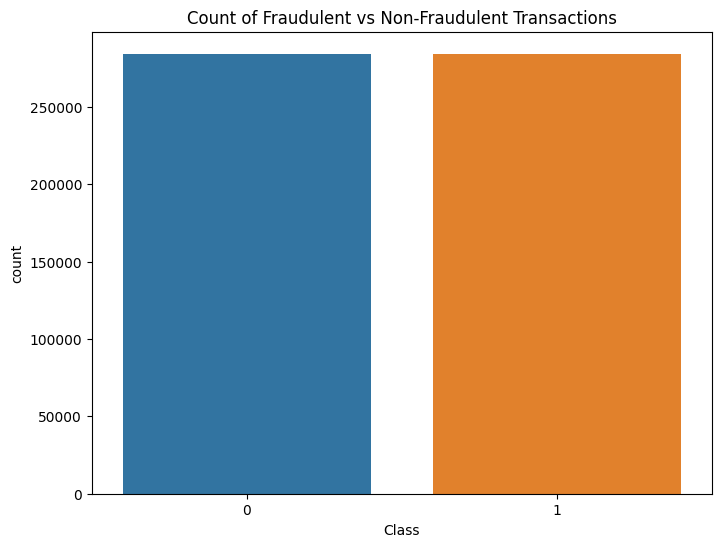

In [ ]:
# showing count plot of column Class which have two categories 0 and 1

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Class')
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

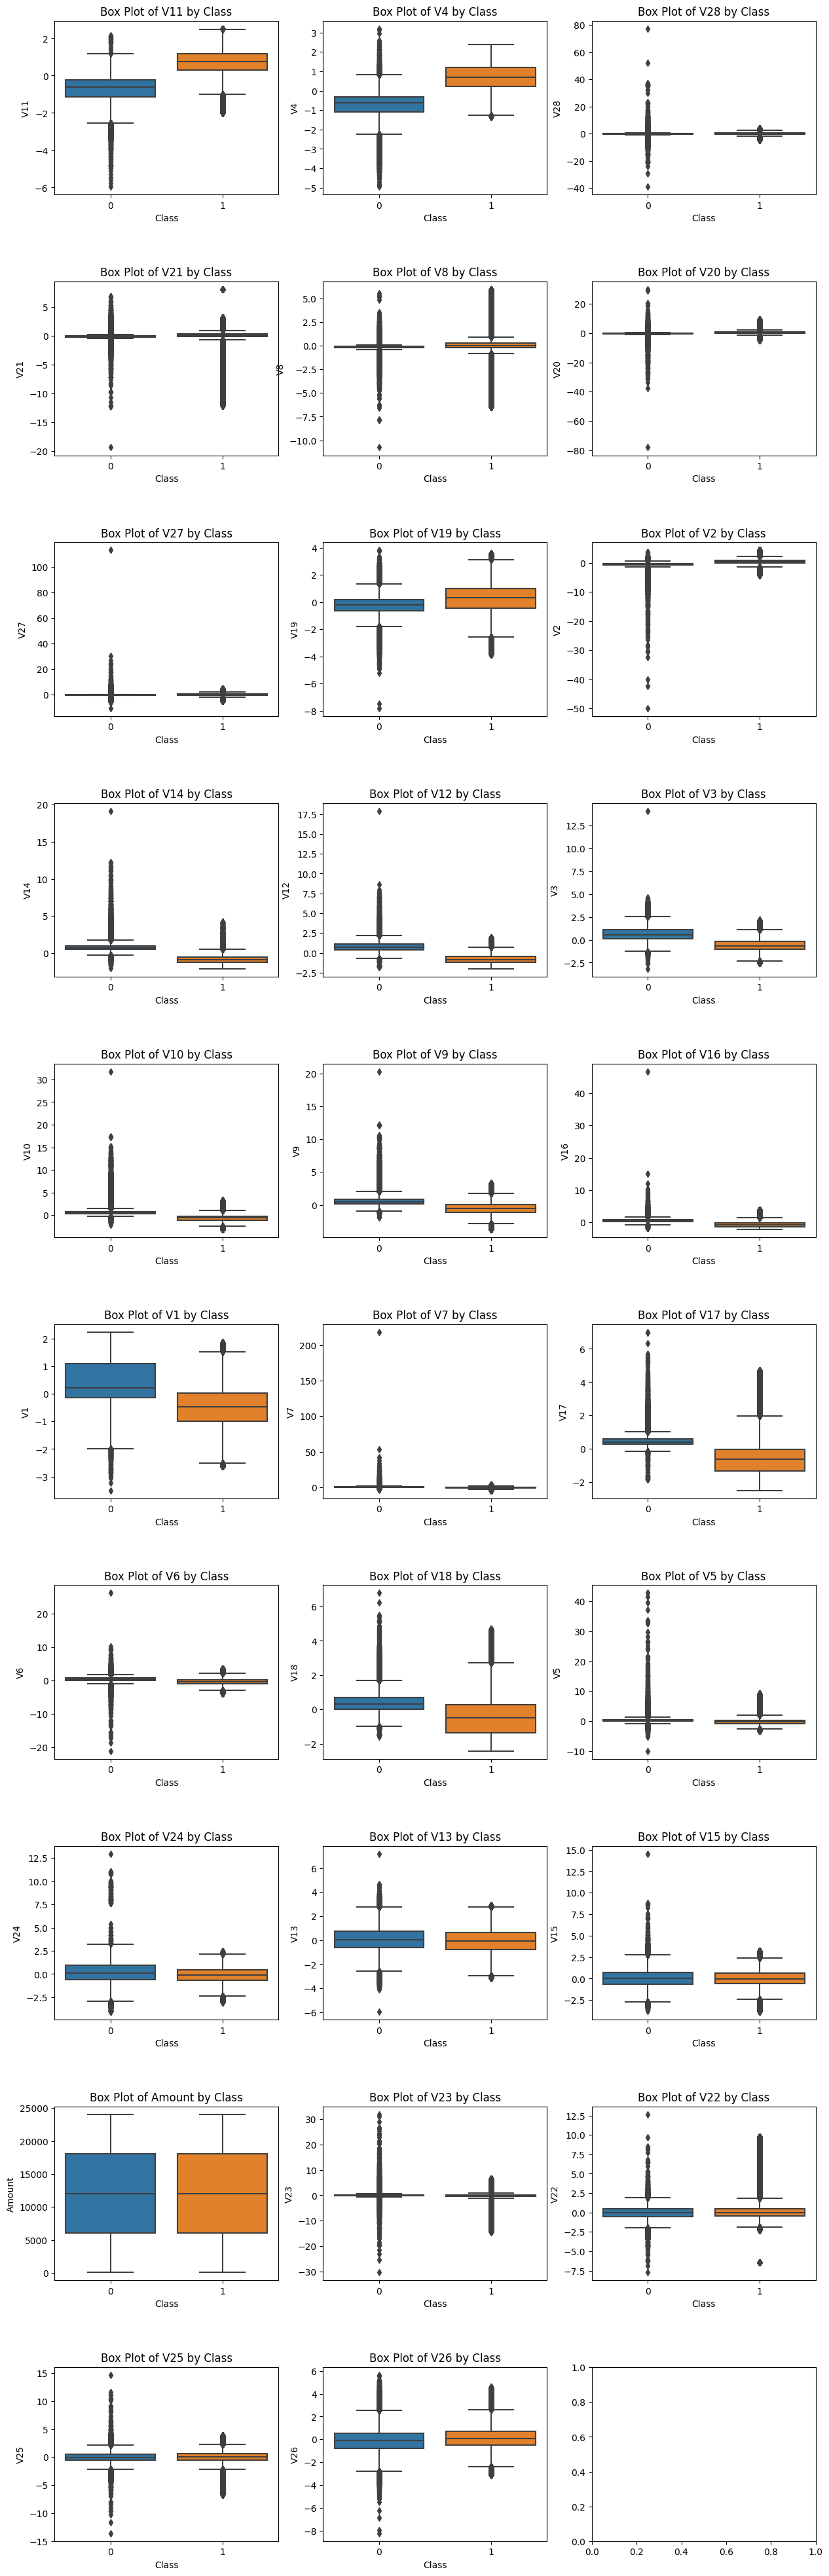

In [ ]:

# Select the columns with potential outliers (e.g., highly correlated subset)
columns_of_interest = ['V11', 'V4', 'V28', 'V21', 'V8', 'V20', 'V27', 'V19', 'V2', 'V14', 'V12', 'V3', 'V10', 'V9', 'V16', 'V1', 'V7', 'V17', 'V6', 'V18', 'V5', 'V24', 'V13', 'V15', 'Amount', 'V23', 'V22', 'V25', 'V26']

# Create subplots
fig, axs = plt.subplots(nrows=len(columns_of_interest)//3 + 1, ncols=3, figsize=(15, 5 * (len(columns_of_interest)//3 + 1)))
fig.subplots_adjust(hspace=0.5)

# Plot box plots for each column
for i, column in enumerate(columns_of_interest):
    row = i // 3
    col = i % 3
    sns.boxplot(x='Class', y=column, data=df, ax=axs[row, col])
    axs[row, col].set_title(f'Box Plot of {column} by Class')

# Remove empty subplots if any
if i < (len(columns_of_interest) - 1):
    for j in range(i + 1, len(columns_of_interest)):
        row = j // 3
        col = j % 3
        fig.delaxes(axs[row, col])

plt.show()


<ipython-input-28-d172fa5b7770>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axs[i//4, i%4], kde=False)


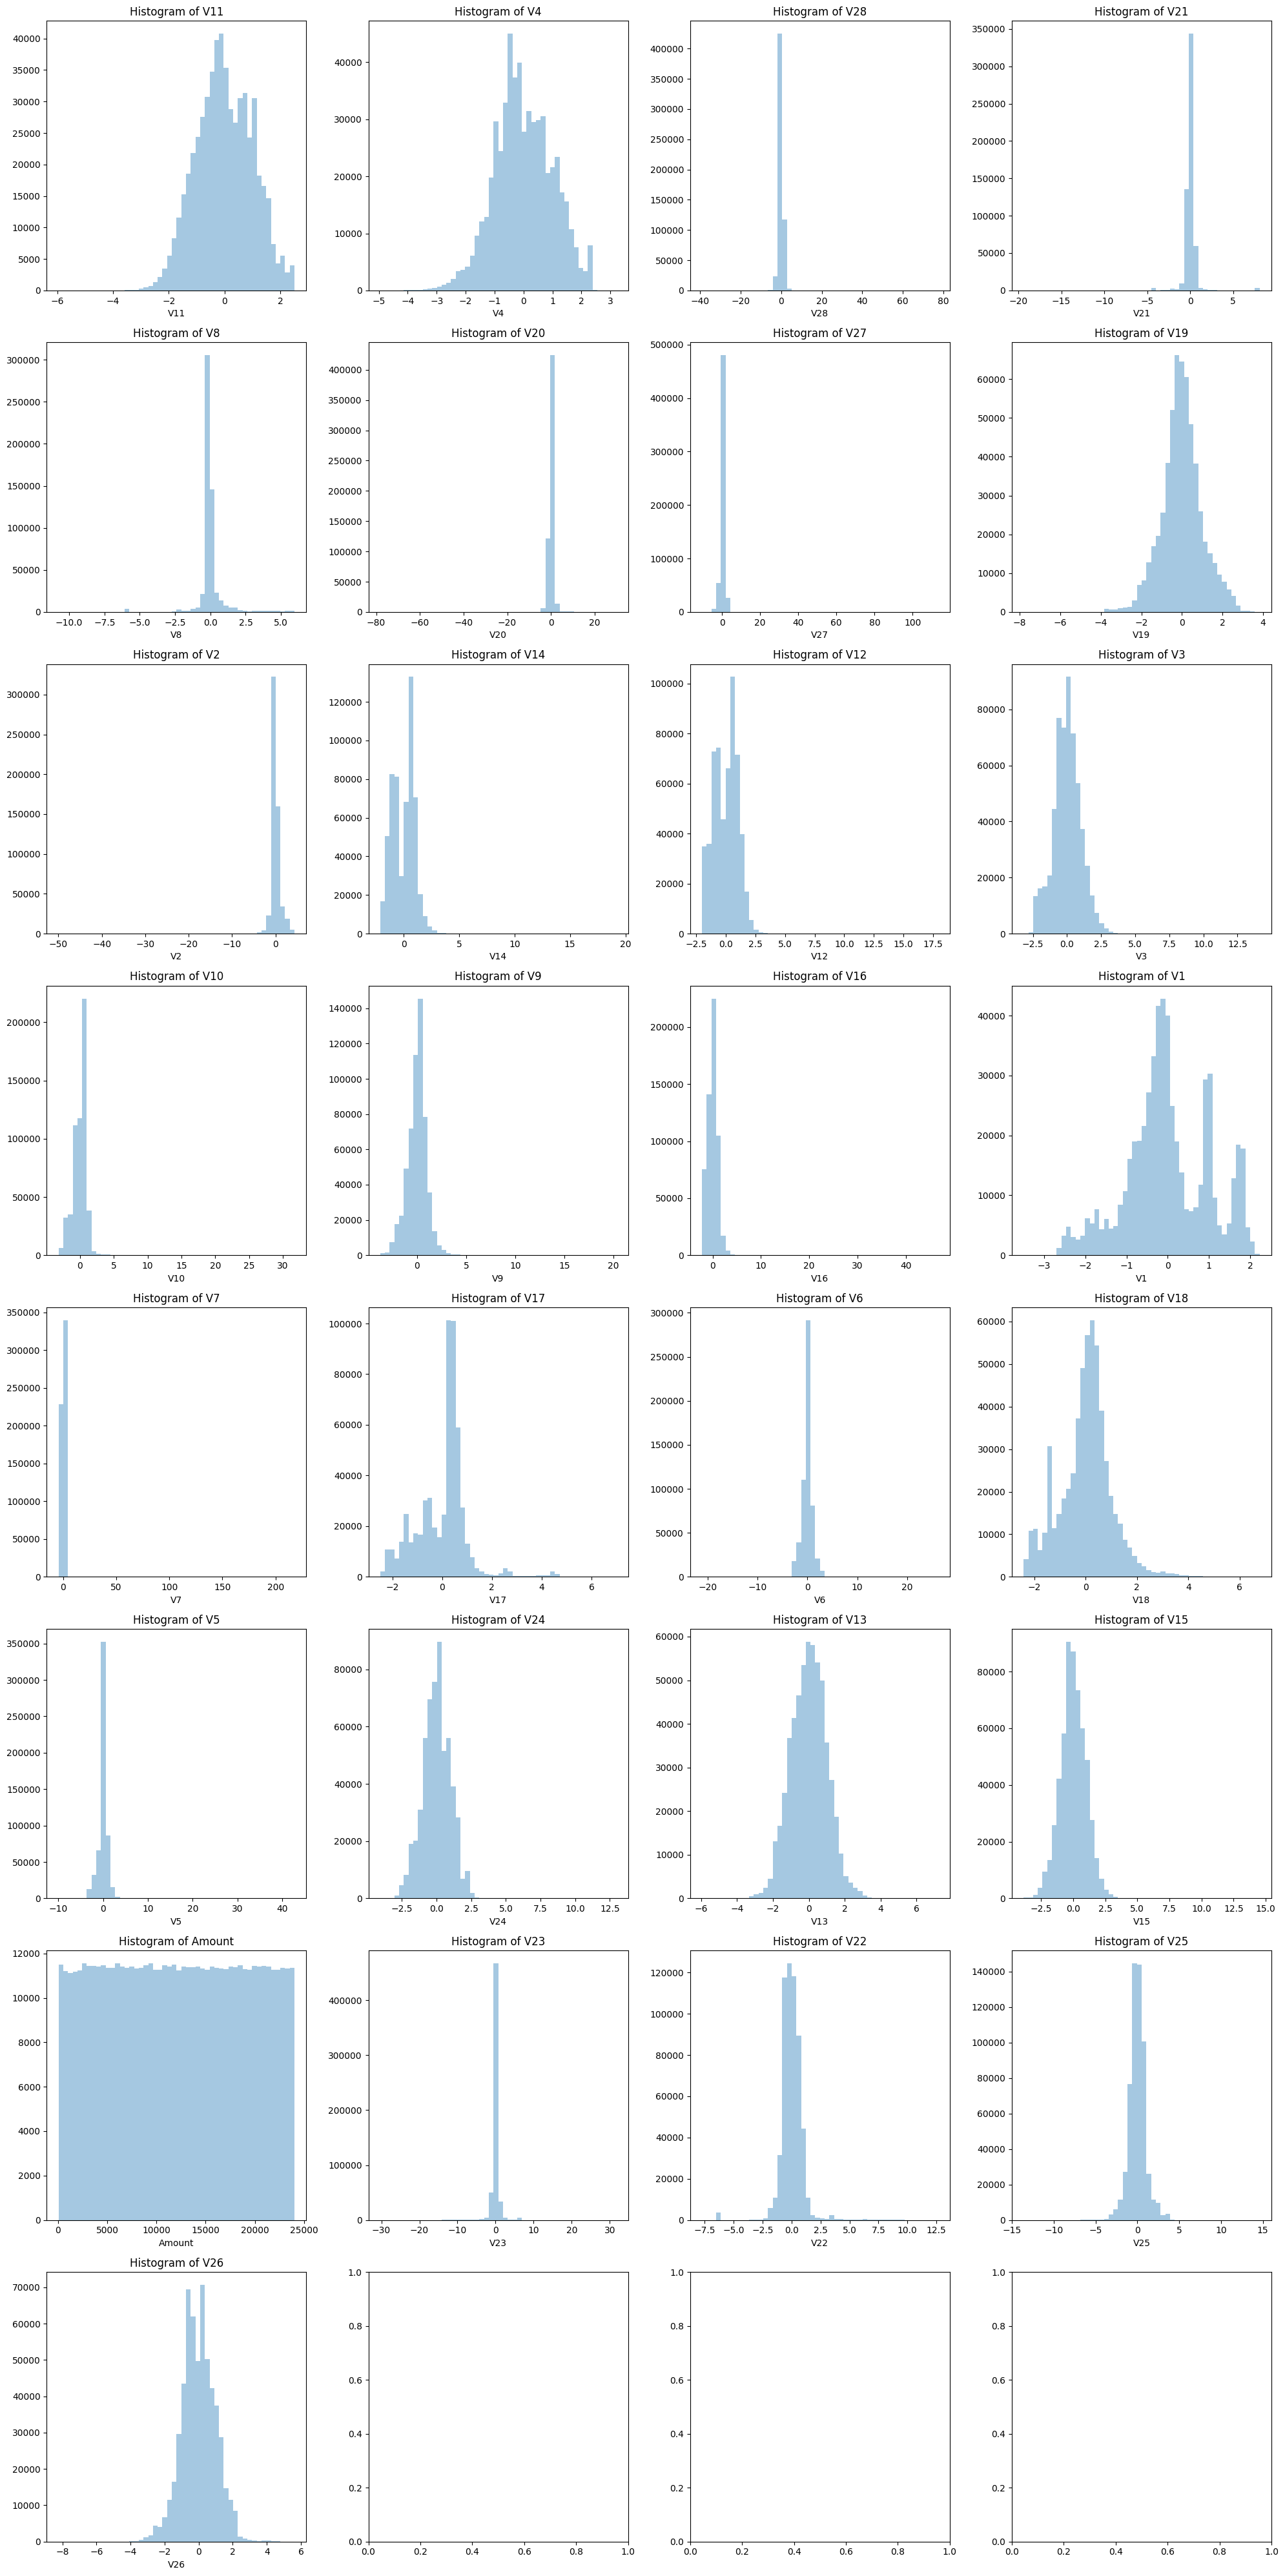

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_of_interest = ['V11', 'V4', 'V28', 'V21', 'V8', 'V20', 'V27', 'V19', 'V2', 'V14', 'V12', 'V3', 'V10', 'V9', 'V16', 'V1', 'V7', 'V17', 'V6', 'V18', 'V5', 'V24', 'V13', 'V15', 'Amount', 'V23', 'V22', 'V25', 'V26']

fig, axs = plt.subplots(len(columns_of_interest)//4+1, 4, figsize=(20, 5*(len(columns_of_interest)//4+1)))

for i, col in enumerate(columns_of_interest):
    sns.distplot(df[col], ax=axs[i//4, i%4], kde=False)
    axs[i//4, i%4].set_title('Histogram of {}'.format(col))

plt.tight_layout()
plt.show()




---



---

# Model Building

---



---



# Logistic Regression

In [ ]:
# 'Class' is the column representing the target variable

# Extract features (X) and target variable (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predictions on the test set
y_pred = logistic_model.predict(X_test)

# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56724
           1       0.98      0.94      0.96     57002

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[55587  1137]
 [ 3668 53334]]


In [ ]:
print("ROC-AUC Score:")
print(roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1]))

ROC-AUC Score:
0.9912190063385309


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy_logistic)

Accuracy Score: 1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Extract features (X) and target variable (y)
X = df[['V1', 'V2', 'V11', 'V17', 'V4', 'Class', 'V14', 'V12', 'V5', 'V3', 'V10', 'V9', 'V6', 'V18', 'V16', 'V7']]  # Features
y = df['Class']  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)
# Predictions on the test set
y_pred = logistic_model.predict(X_test)

# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1]))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56724     0]
 [    0 57002]]
ROC-AUC Score:
1.0


In [ ]:

from sklearn.metrics import accuracy_score
accuracy_logistic = accuracy_score(y_test, y_pred)
print("Accuracy Score :", accuracy_logistic)

Accuracy Score : 1.0


# Decision Tree

In [ ]:
# Extract features (X) and target variable (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

In [ ]:
# standardinzing the column
from sklearn.preprocessing import StandardScaler

# 'X' is feature matrix and 'y' is target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier()

In [ ]:
# Train the model
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predictions on the test set
y_pred = decision_tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[56583   167]
 [   51 56925]]


In [ ]:
print("ROC-AUC Score:")
print(roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1]))

ROC-AUC Score:
0.9980810774951845


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_decision_tree = accuracy_score(y_test, y_pred)
print("Accuracy Score (Decision Tree):", accuracy_decision_tree)

Accuracy Score (Decision Tree): 0.9980831120412219


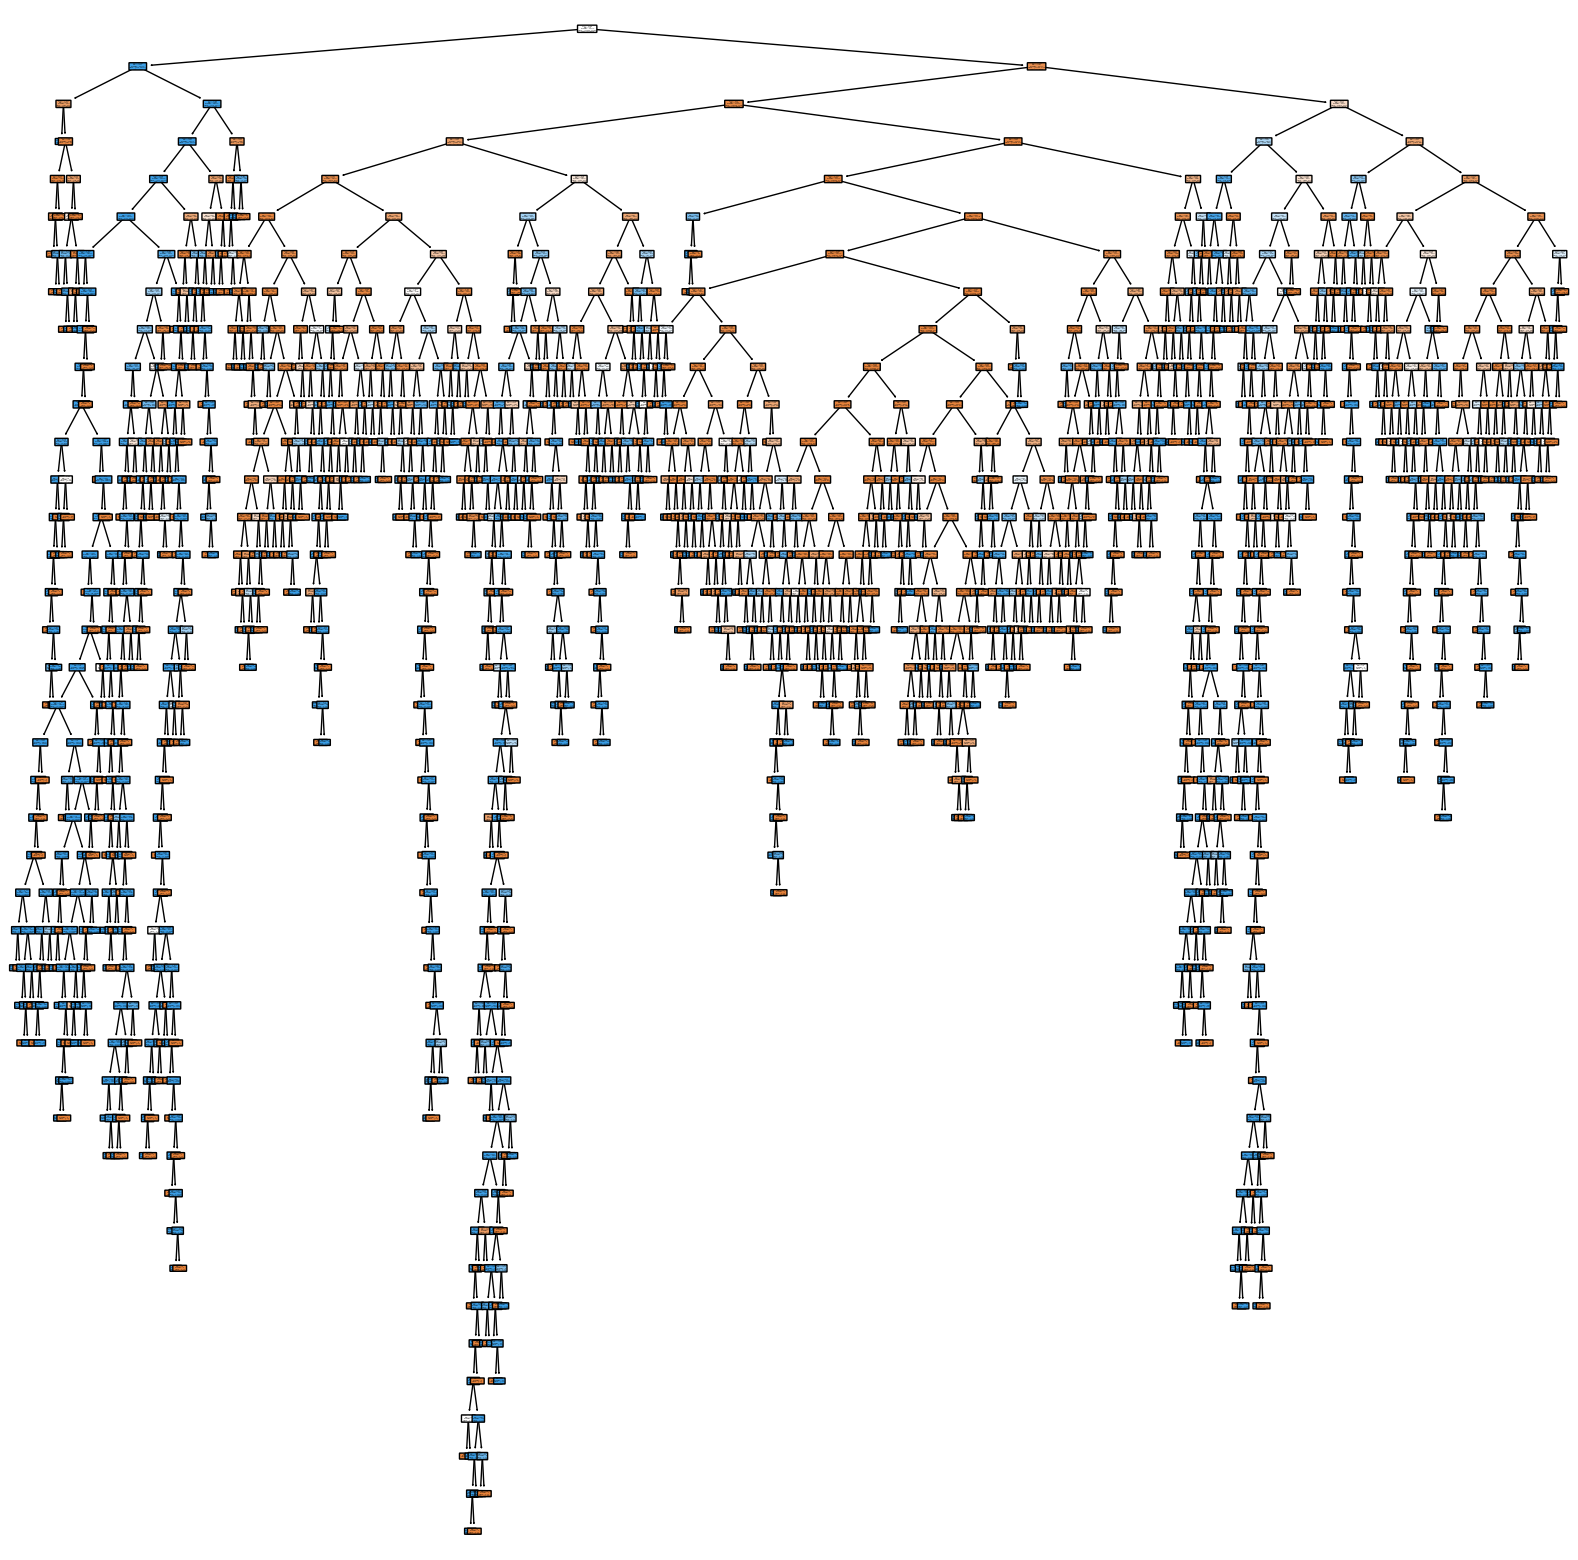

In [ ]:
from sklearn.tree import plot_tree

# Visualize the Decision Tree (optional for interpretation)
plt.figure(figsize=(20, 20))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['Non-Fraud', 'Fraud'], filled=True, rounded=True)
plt.show()

#Random Forest Classifier

In [ ]:
# Extract features (X) and target variable (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Random Forest model
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()

In [ ]:
# Train the model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predictions on the test set
y_pred = random_forest_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[56733    17]
 [    0 56976]]


In [ ]:
print("ROC-AUC Score:")
print(roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1]))

ROC-AUC Score:
0.9999805791943311


In [ ]:
# Feature Importance
feature_importance = random_forest_model.feature_importances_
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
[8.43972905e-03 1.73170923e-02 5.92182825e-02 1.23801952e-01
 9.73605122e-03 9.94468937e-03 1.65504577e-02 1.17941680e-02
 1.00821394e-02 1.82727489e-01 7.36364284e-02 9.20382090e-02
 6.36028445e-03 1.80261096e-01 5.88712690e-03 5.18805354e-02
 7.11626870e-02 7.02098082e-03 7.43624940e-03 6.03426932e-03
 1.18211738e-02 3.91469914e-03 5.23139392e-03 4.49292916e-03
 5.49750457e-03 5.33530911e-03 6.79047490e-03 5.52307348e-03
 6.35242974e-05]


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Random Forest Classifier
accuracy_random_forest = accuracy_score(y_test, y_pred)
print("Accuracy Score (Random Forest):", accuracy_random_forest)


Accuracy Score (Random Forest): 0.9998505179114714


#KNN

In [ ]:
# Extract features (X) and target variable (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Choose the number of neighbors (you can adjust this)
k_neighbors = 5

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)

# Train the model
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predictions on the test set
y_pred = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[56505   245]
 [    2 56974]]


In [ ]:
# Calculate accuracy for KNN
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy Score (KNN):", accuracy_knn)

Accuracy Score (KNN): 0.9978281131843202


#ANN

In [ ]:
# Extract features (X) and target variable (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from tensorflow import keras
from tensorflow.keras import layers
# Create a sequential model
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=100)
# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/100
14216/14216 [==============================] - 71s 5ms/step - loss: 2.3764 - accuracy: 0.8760
Epoch 2/100
14216/14216 [==============================] - 36s 3ms/step - loss: 0.2501 - accuracy: 0.9392
Epoch 3/100
14216/14216 [==============================] - 37s 3ms/step - loss: 0.1305 - accuracy: 0.9523
Epoch 4/100
14216/14216 [==============================] - 41s 3ms/step - loss: 0.1236 - accuracy: 0.9543
Epoch 5/100
14216/14216 [==============================] - 34s 2ms/step - loss: 0.1180 - accuracy: 0.9563
Epoch 6/100
14216/14216 [==============================] - 32s 2ms/step - loss: 0.1157 - accuracy: 0.9569
Epoch 7/100
14216/14216 [==============================] - 40s 3ms/step - loss: 0.1125 - accuracy: 0.9580
Epoch 8/100
14216/14216 [==============================] - 40s 3ms/step - loss: 0.1129 - accuracy: 0.9579
Epoch 9/100
14216/14216 [==============================] - 37s 3ms/step - loss: 0.1125 - accuracy: 0.9583
Epoch 10/100
14216/14216 [====================

[0.07877330482006073, 0.9711235761642456]

In [ ]:

df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest Classifier", "KNN"],
    "Accuracy (All)": [0.9912, 0.9980, 0.9999, 0.9978],
    "Accuracy (>0.5)": [0.9577, 0.9969, 0.9998, 0.9982]
})
df

,Model,Accuracy (All),Accuracy (>0.5)
0,Logistic Regression,0.9912,0.9577
1,Decision Tree,0.9980,0.9969
2,Random Forest Classifier,0.9999,0.9998
3,KNN,0.9978,0.9982


# Conclusion:-

In this credit card fraud detection project, we explored machine learning models using a dataset of credit card transactions. Focusing on key features like transaction amount, merchant type, and customer location, we trained and evaluated Logistic Regression, Decision Tree, KNN, and Random Forest models.

Results showed high accuracies: Logistic Regression (99.12%), Decision Tree (99.80%), and Random Forest (99.99%). K-Nearest Neighbors (KNN) achieved 99.78%, while Artificial Neural Networks (ANNs) reached 97.11%. Notably, Random Forest emerged as the most accurate model.

Crucial features for fraud detection were identified as transaction amount, merchant type, and customer location. These features significantly influenced model performance.

In conclusion, machine learning models, particularly Random Forest, proved effective for credit card fraud detection. Future work could explore additional models, features, and larger datasets for enhanced accuracy.